In [20]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#loading the data from csv file
data = pd.read_csv("housing.csv")

In [22]:
#observing the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
#data exploration
data.info()

#in this dataset we have unequal number datasets i.e  no. of total bedrooms is not equal to total rooms and other datas
#to carry out the calculation we need to make the number of datasets equal so we can drop the null datasets so we can get only non-null value which eventually will be equal no. of datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
#return data with only non-null value or in other words drop the data having null value
#"inplace=True permanently saves the edited data from the function dropna()"
data.dropna(inplace=True)



In [25]:
data.info()
#after dropping null values we get equal no. of data count of each class of data so that we can further continue our calculation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [26]:
#defining X and Y as known and unknown datasets simulteanously
from sklearn.model_selection import train_test_split

#X will be the dataframe without the target variable i.e median_house_value
X = data.drop(['median_house_value'], axis=1)

#Y is only going to be median house value(which we need to find)
y = data['median_house_value']

In [27]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [28]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [29]:
#splitting training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
#now we are going to join x_training_data and y_training_data so that we can observe some correlation between x and y.
train_data = X_train.join(y_train)

In [31]:
#here we can see the combined xy dataset
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1770,-122.35,37.95,45.0,2142.0,431.0,1318.0,431.0,3.0737,NEAR BAY,111600.0
19289,-122.82,38.41,32.0,701.0,182.0,489.0,168.0,2.7850,<1H OCEAN,169300.0
6477,-118.08,34.09,32.0,3214.0,718.0,2316.0,751.0,3.7066,<1H OCEAN,206800.0
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392,<1H OCEAN,271500.0
9920,-122.33,38.33,15.0,3193.0,468.0,1303.0,426.0,5.3017,NEAR BAY,202600.0
...,...,...,...,...,...,...,...,...,...,...
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,INLAND,62900.0
14774,-117.08,32.59,8.0,2888.0,662.0,2441.0,683.0,2.7048,NEAR OCEAN,153000.0
10038,-121.04,39.22,14.0,1889.0,471.0,853.0,399.0,2.2500,INLAND,112500.0
19778,-122.18,39.93,35.0,1387.0,272.0,610.0,237.0,2.1759,INLAND,59500.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

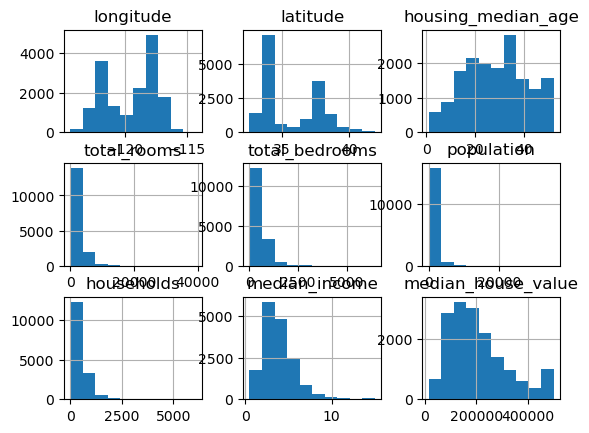

In [32]:
#let's see the histogram of the datasets
train_data.hist()

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

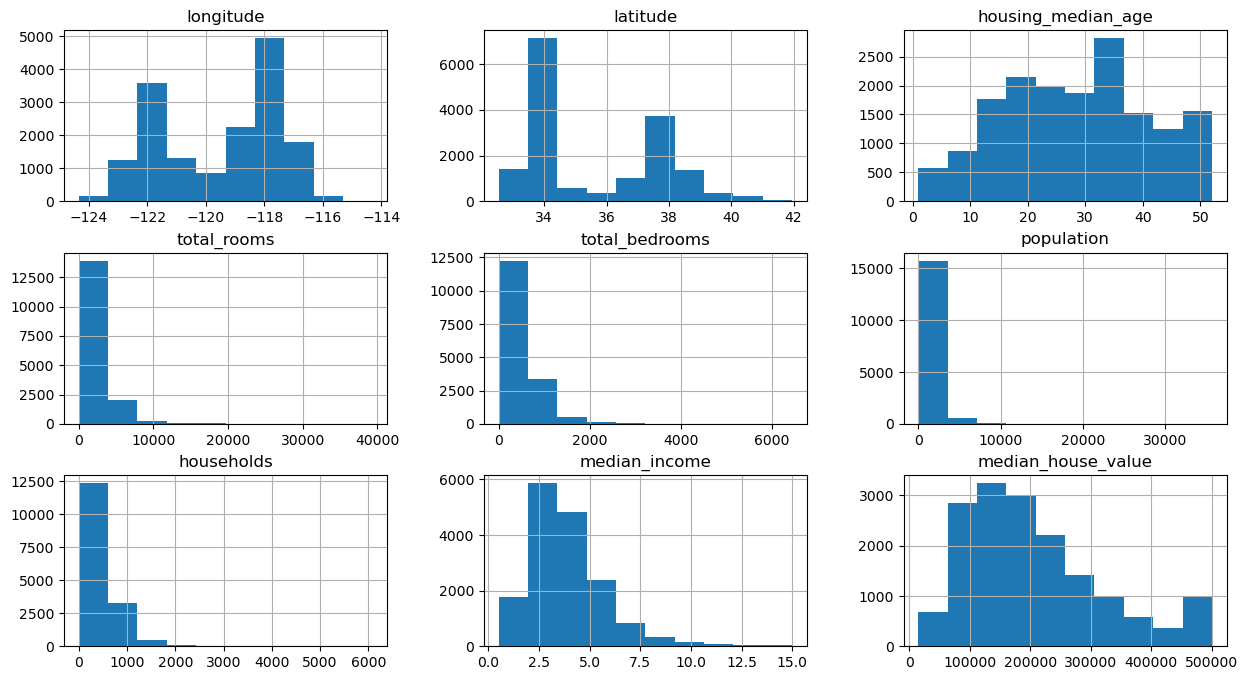

In [34]:
#here we can see the datasets and the target variable in graphical manner
train_data.hist(figsize=(15,8))

In [35]:
#correlation of datasets with the target variable
#correlation matrix
train_data.corr()

/tmp/ipykernel_16275/3846974952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926423,-0.106866,0.041488,0.067453,0.097562,0.054660,-0.015848,-0.048898
latitude,-0.926423,1.000000,0.011490,-0.033594,-0.065471,-0.106686,-0.069809,-0.077843,-0.139612
housing_median_age,-0.106866,0.011490,1.000000,-0.356605,-0.318390,-0.290264,-0.300467,-0.116893,0.109842
total_rooms,0.041488,-0.033594,-0.356605,1.000000,0.930964,0.851345,0.919358,0.198144,0.138203
total_bedrooms,0.067453,-0.065471,-0.318390,0.930964,1.000000,0.872273,0.979029,-0.008536,0.052852
population,0.097562,-0.106686,-0.290264,0.851345,0.872273,1.000000,0.903087,0.003406,-0.023947
households,0.054660,-0.069809,-0.300467,0.919358,0.979029,0.903087,1.000000,0.012693,0.068660
median_income,-0.015848,-0.077843,-0.116893,0.198144,-0.008536,0.003406,0.012693,1.000000,0.692929
median_house_value,-0.048898,-0.139612,0.109842,0.138203,0.052852,-0.023947,0.068660,0.692929,1.000000


/tmp/ipykernel_16275/3992326483.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

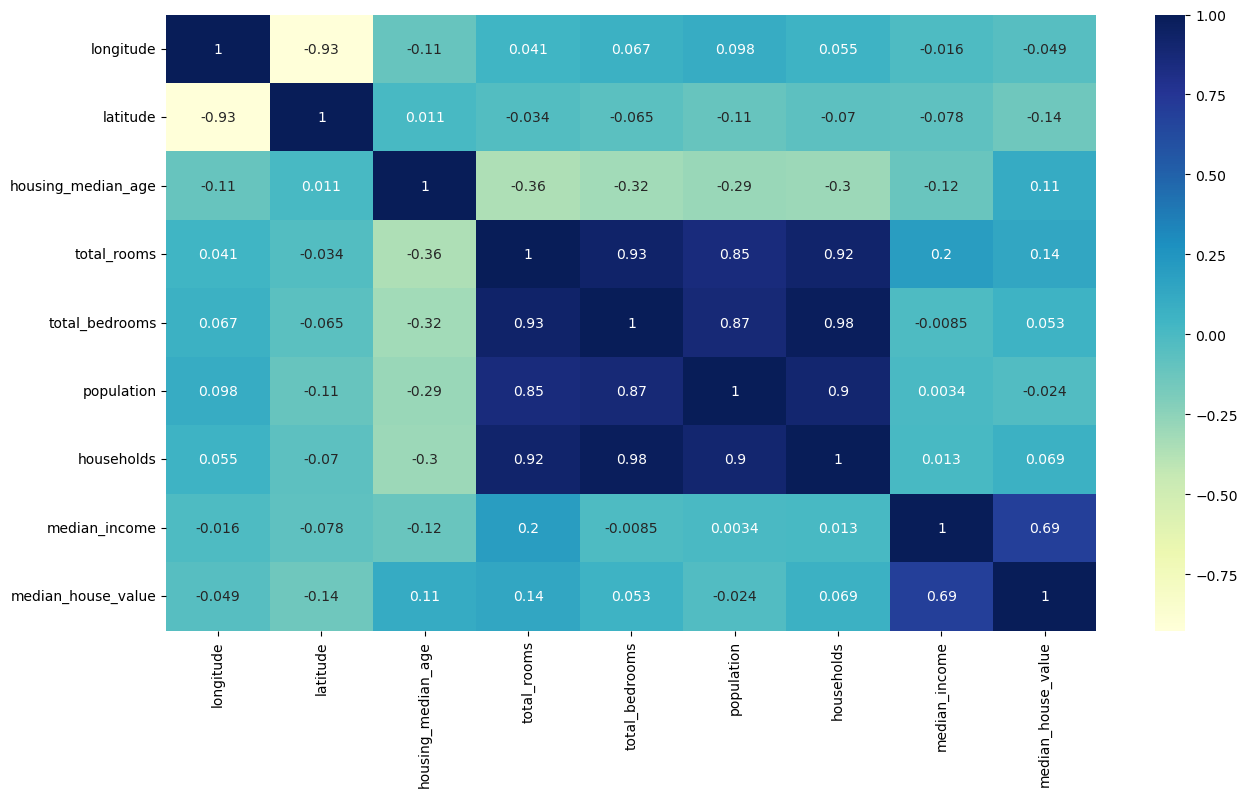

In [40]:
#plotting the above correlation matrix in heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#where annot=annotation, cmap=colormap, YlGnBu=Yellow Green Blue
#we can see that the correlation of median_houe_value with other datasets which is the main goal of our data exploration
#for example longitude and latitude are negatively correlated, total_rooms is positively correlated with the median_house_value